## Tutorium 6 - Kantendetektion


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Wir haben ein verrauschtes Bild:

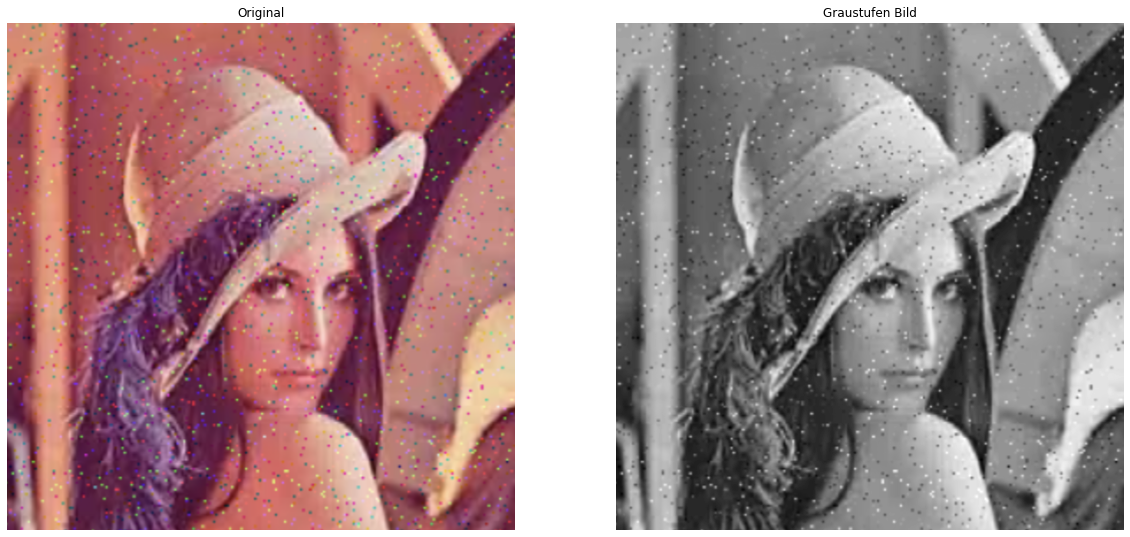

In [2]:
img = plt.imread("lena_sp_noise.png")
height, width, channel = img.shape

r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
grayscale_img = 0.2989 * r + 0.5870 * g + 0.1140 * b

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].axis('off')
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].axis('off')
axs[1].imshow(grayscale_img, cmap = 'gray')
axs[1].set_title('Graustufen Bild')
plt.show()

Wenn wir jetzt die Kanten detektieren wollen, stört das Rauschen im Bild erheblich:

In [3]:
s_x = np.zeros_like(grayscale_img)
s_y = np.zeros_like(grayscale_img)
x_filter = np.zeros((3,3), dtype=int)
y_filter = np.zeros((3,3), dtype=int)

x_filter[0:4:2,0] = -1
x_filter[1,0] = -2
x_filter[0:4:2,2] = 1
x_filter[1,2] = 2

y_filter[0,0:4:2] = -1
y_filter[0,1] = -2
y_filter[2,0:4:2] = 1
y_filter[2,1] = 2
print("Sobel X-Filter:\n {}\n".format(x_filter))
print("Sobel Y-Filter:\n {}".format(y_filter))

Sobel X-Filter:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Sobel Y-Filter:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


Wir ignorieren hier den Rand bei der Kantendetektion.

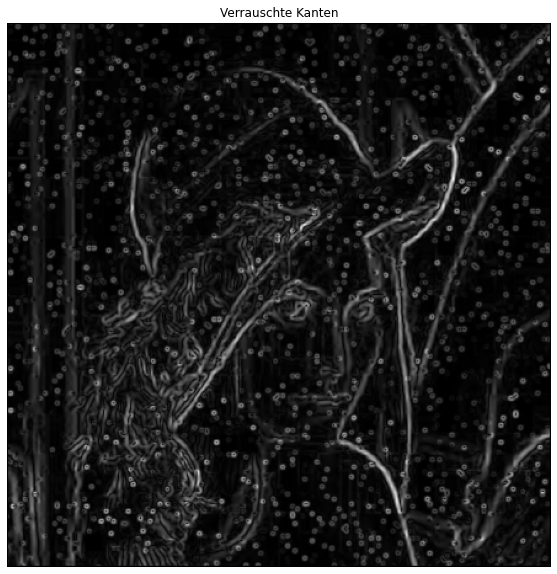

In [4]:
for y in range(1, height-1):
    for x in range(1, width-1):
        temp = grayscale_img[y-1:y+2, x-1:x+2]
        tempX = temp * x_filter
        tempY = temp * y_filter
        s_x[y,x] = sum(sum(tempX))
        s_y[y,x] = sum(sum(tempY))

img_edges = np.sqrt(s_x ** 2 + s_y ** 2)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Verrauschte Kanten')
plt.imshow(img_edges, cmap= 'gray')
plt.show()

Auf dem Bild ist gut zu erkennen, dass jeder verrauschte Punkt eine eigene Kante hat.<br>
Der Mehrwert dieser Kanten, besonders für die weitere maschinelle Verarbeitung, ist nahe 0.

### Lösungsansatz: Wir entfernen das Rauschen durch Glättung

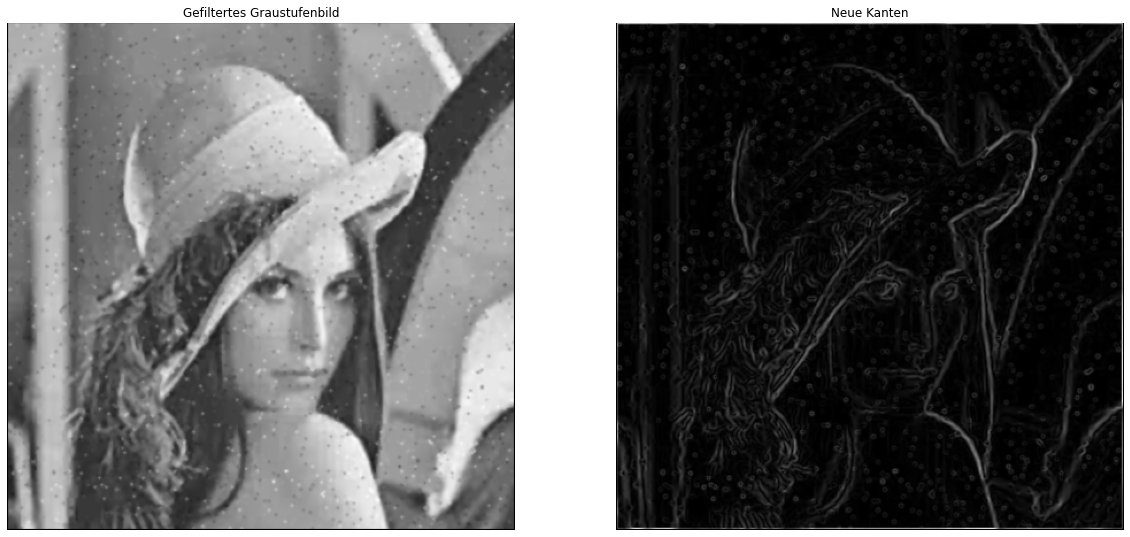

In [5]:
# Medianfilter
img2 = np.zeros_like(grayscale_img)
for y in range(1, height-1):
    for x in range(1, width-1):
        temp = grayscale_img[y-1:y+2, x-1:x+2]
        img2[y,x] = np.median(temp)
        
#Kantendetektion die 2.
s_x = np.zeros_like(img2)
s_y = np.zeros_like(img2)

for y in range(1, height-1):
    for x in range(1, width-1):
        temp = img2[y-1:y+2, x-1:x+2]
        tempX = temp * x_filter
        tempY = temp * y_filter
        s_x[y,x] = sum(sum(tempX))
        s_y[y,x] = sum(sum(tempY))

img2_edges = np.sqrt(s_x ** 2 + s_y ** 2)

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].axis('off')
axs[0].imshow(img2, cmap= 'gray')
axs[0].set_title('Gefiltertes Graustufenbild')
axs[1].axis('off')
axs[1].imshow(img2_edges, cmap = 'gray')
axs[1].set_title('Neue Kanten')
plt.show()